In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import pickle

from qubic.lib.QskySim import get_angular_profile, get_noise_invcov_profile

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [ ]:
new = pickle.load(open("planck/maps/new_None.pkl", "rb"))
old = pickle.load(open("planck/maps/old_None.pkl", "rb"))

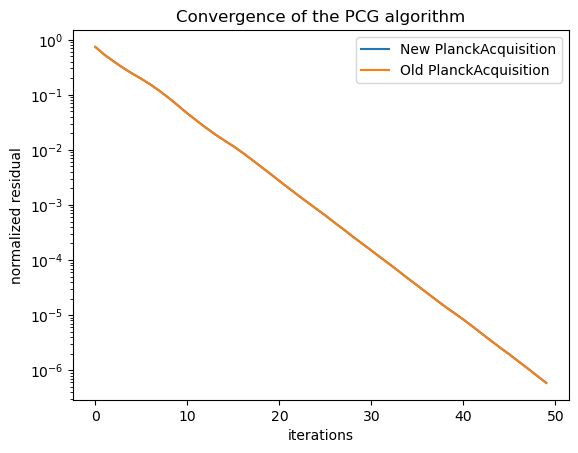

In [3]:
convergence_new = new["convergence"]
convergence_old = old["convergence"]

plt.plot(convergence_new, label="New PlanckAcquisition")
plt.plot(convergence_old, label="Old PlanckAcquisition")
plt.xlabel('iterations')
plt.ylabel('normalized residual')
plt.title('Convergence of the PCG algorithm')
plt.yscale('log')
plt.legend()
plt.show()

In [4]:
maps_in_new = new['maps_in']
maps_rec_new = new['maps']
residuals_new = new['maps_noise']

maps_in_old = old['maps_in']
maps_rec_old = old['maps']
residuals_old = old['maps_noise']

New PlanckAcquisition


Text(0.5, 1.0, 'New PlanckAcquisition')

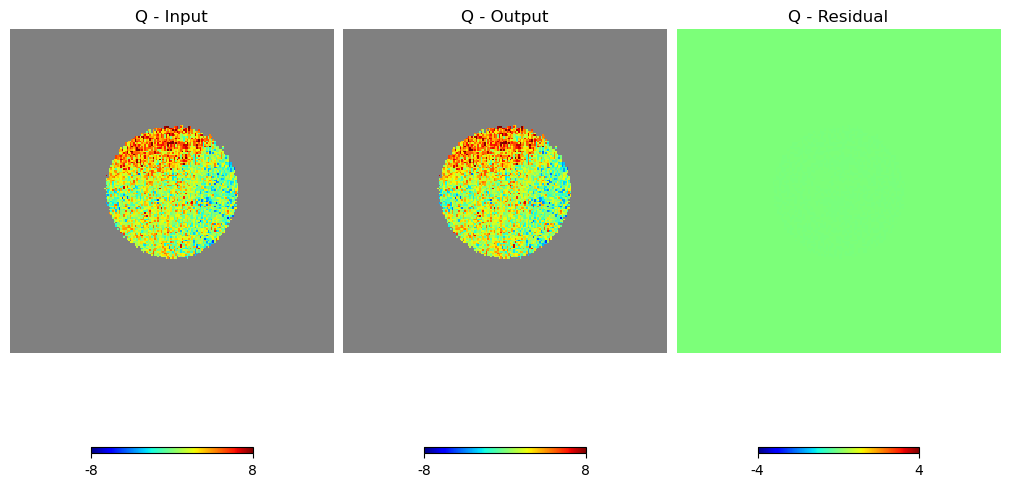

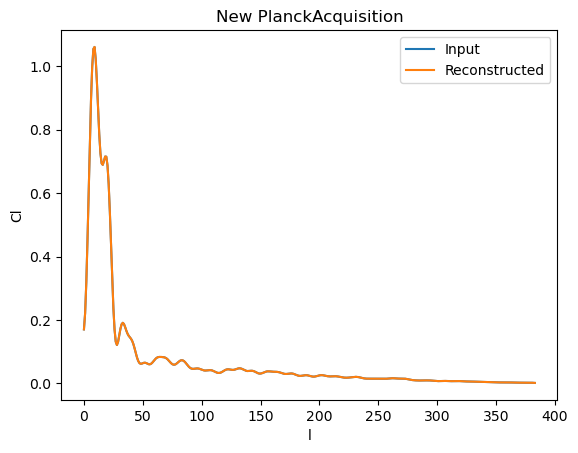

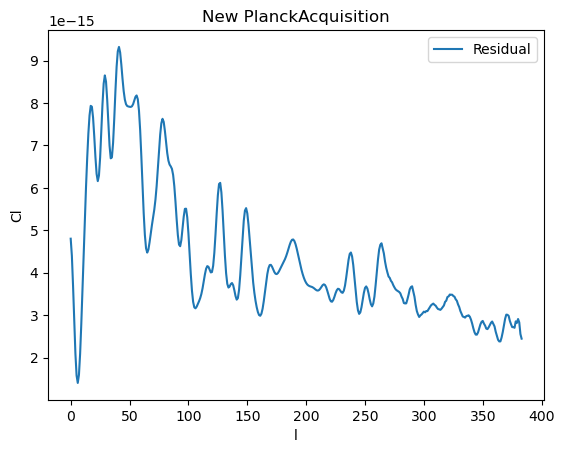

In [ ]:
stk = ['I', 'Q', 'U']
inu = 1
istk = 1
n_sig = 3
reso = 30
min = -8
max = 8

plt.figure(figsize=(10, 12))
print("New PlanckAcquisition")
k=1
hp.gnomview(maps_in_new[inu, :, istk], cmap='jet', rot=new['center'], min=min, max=max, reso=reso, sub=(1, 3, k), title=f'{stk[istk]} - Input', notext=True)
hp.gnomview(maps_rec_new[inu, :, istk], cmap='jet', rot=new['center'], min=min, max=max, reso=reso, sub=(1, 3, k+1), title=f'{stk[istk]} - Output', notext=True)
hp.gnomview(residuals_new[inu, :, istk], cmap='jet', rot=new['center'], min=min/2, max=max/2, reso=reso, sub=(1, 3, k+2), title=f'{stk[istk]} - Residual', notext=True)
k+=3

plt.figure()
plt.plot(hp.anafast(maps_in_new[inu, :, 0]), label="Input")
plt.plot(hp.anafast(maps_rec_new[inu, :, 0]), label="Reconstructed")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("New PlanckAcquisition")

plt.figure()
plt.plot(hp.anafast(maps_in_new[inu, :, 0] - maps_rec_new[inu, :, 0]), label="Residual")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("New PlanckAcquisition")

Old PlanckAcquisition


Text(0.5, 1.0, 'Old PlanckAcquisition')

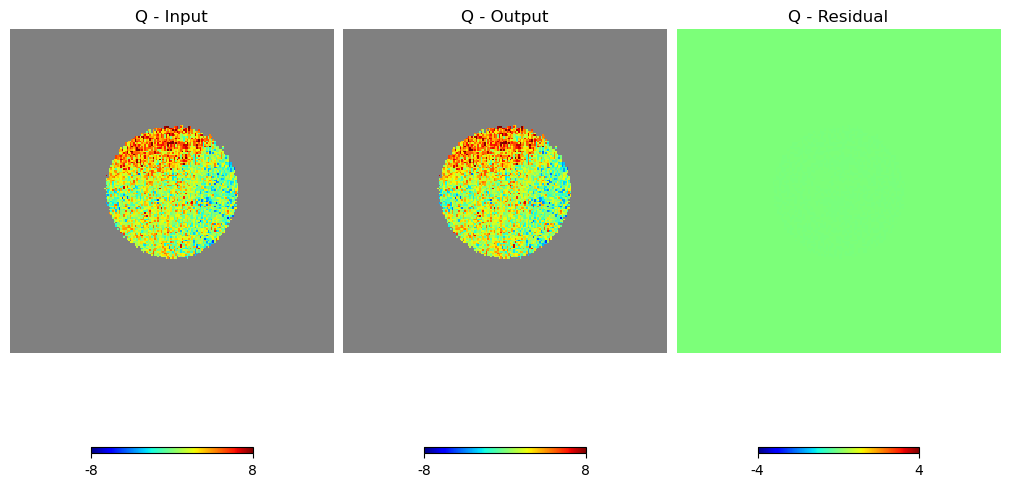

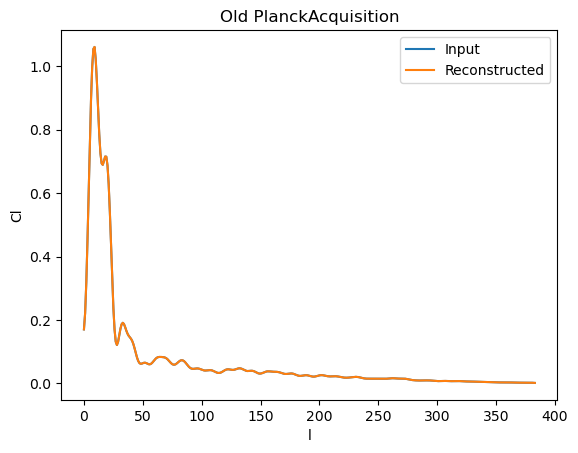

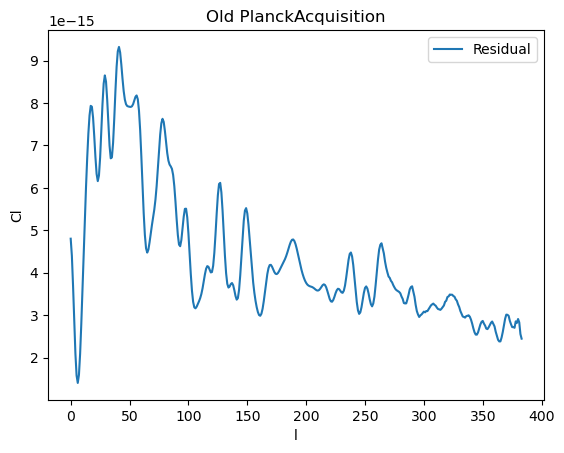

In [ ]:
plt.figure(figsize=(10, 12))
print("Old PlanckAcquisition")
k=1
hp.gnomview(maps_in_old[inu, :, istk], cmap='jet', rot=old['center'], min=min, max=max, reso=reso, sub=(1, 3, k), title=f'{stk[istk]} - Input', notext=True)
hp.gnomview(maps_rec_old[inu, :, istk], cmap='jet', rot=old['center'], min=min, max=max, reso=reso, sub=(1, 3, k+1), title=f'{stk[istk]} - Output', notext=True)
hp.gnomview(residuals_old[inu, :, istk], cmap='jet', rot=old['center'], min=min/2, max=max/2, reso=reso, sub=(1, 3, k+2), title=f'{stk[istk]} - Residual', notext=True)
k+=3

plt.figure()
plt.plot(hp.anafast(maps_in_old[inu, :, 0]), label="Input")
plt.plot(hp.anafast(maps_rec_old[inu, :, 0]), label="Reconstructed")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Old PlanckAcquisition")

plt.figure()
plt.plot(hp.anafast(maps_in_old[inu, :, 0] - maps_rec_old[inu, :, 0]), label="Residual")
plt.legend()
plt.xlabel("l")
plt.ylabel("Cl")
plt.title("Old PlanckAcquisition")

(79,) (79,) (79,)
(79,) (79,) (79,)


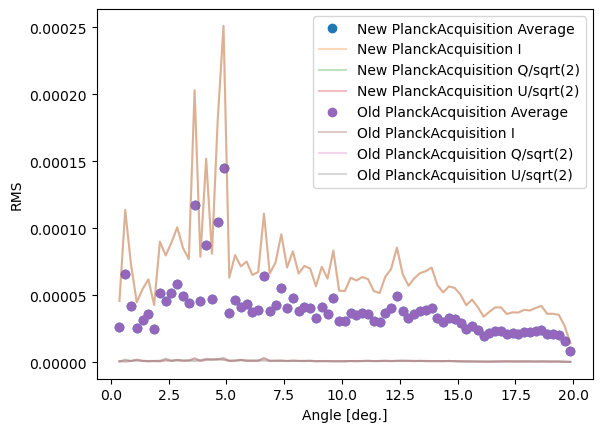

In [7]:
get_angular_profile(residuals_new[0], doplot=True, allstokes=True, nbins=80, thmax=20, label="New PlanckAcquisition")
get_angular_profile(residuals_old[0], doplot=True, allstokes=True, nbins=80, thmax=20, label="Old PlanckAcquisition")
plt.show()

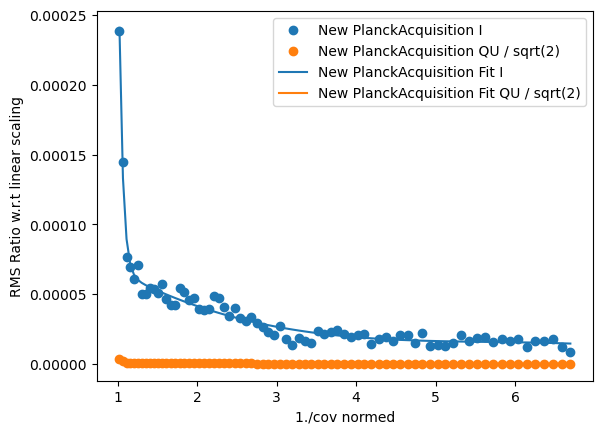

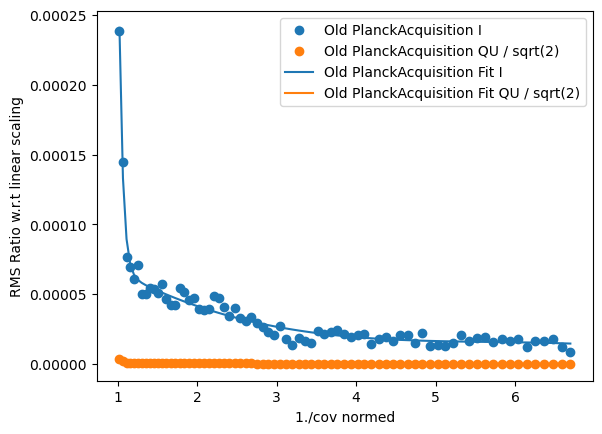

In [8]:
get_noise_invcov_profile(residuals_new[0], new["coverage"], doplot=True, allstokes=True, label="New PlanckAcquisition")
plt.figure()
get_noise_invcov_profile(residuals_old[0], old["coverage"], doplot=True, allstokes=True, label="Old PlanckAcquisition")
plt.show()